# Exercise sheet 6

## Exercise 1 - English red foxes

For the following exercises, you will have to load a new dataset (foxes) from the rethinking package that you installed last week. This dataset (adapted from Grafen & Hails 2002) concerns a sample study of the english population of the red fox. The red fox has benefited from the proximity to humans and has managed to colonise many (sub-)urban areas of the Northern hemisphere. Red foxes live on a specific territory and move in small packs. The dataset contains 5 variables for 116 red foxes: group is the index of the pack the individual belongs to, avgfood is the relative availability of food in a given territory, groupsize is the head count in a given pack, area is the size of the territory and weight is the weight of each individual.

In [1]:
library(rethinking)

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0

Lade nötiges Paket: parallel

rethinking (Version 2.31)


Attache Paket: 'rethinking'


Das folgende Objekt ist maskiert 'package:rstan':

    stan


Das folgende Objekt ist maskiert 'package:stats':

    rstudent




In [2]:
# Looking at the data
data(foxes)
# Dataset for the popultion of red foxes
d <- foxes
d

group,avgfood,groupsize,area,weight
<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.37,2,1.09,5.02
1,0.37,2,1.09,2.84
2,0.53,2,2.05,5.33
2,0.53,2,2.05,6.07
3,0.49,2,2.12,5.85
3,0.49,2,2.12,3.25
4,0.45,2,1.29,4.53
4,0.45,2,1.29,4.09
5,0.74,3,3.78,6.13


1. Perform Gaussian fits using the map quadratic approximation routine between weight and territory size in the one hand and between weight and the size of the pack in the other hand. Following the course example, summarise the results and prepare a figure for both cases, with the raw data, maximum a posteriori model fit and the credible interval mean of your choice. Discuss on the importance of each variable to predict the average red fox weight.

First we take a look at the data.

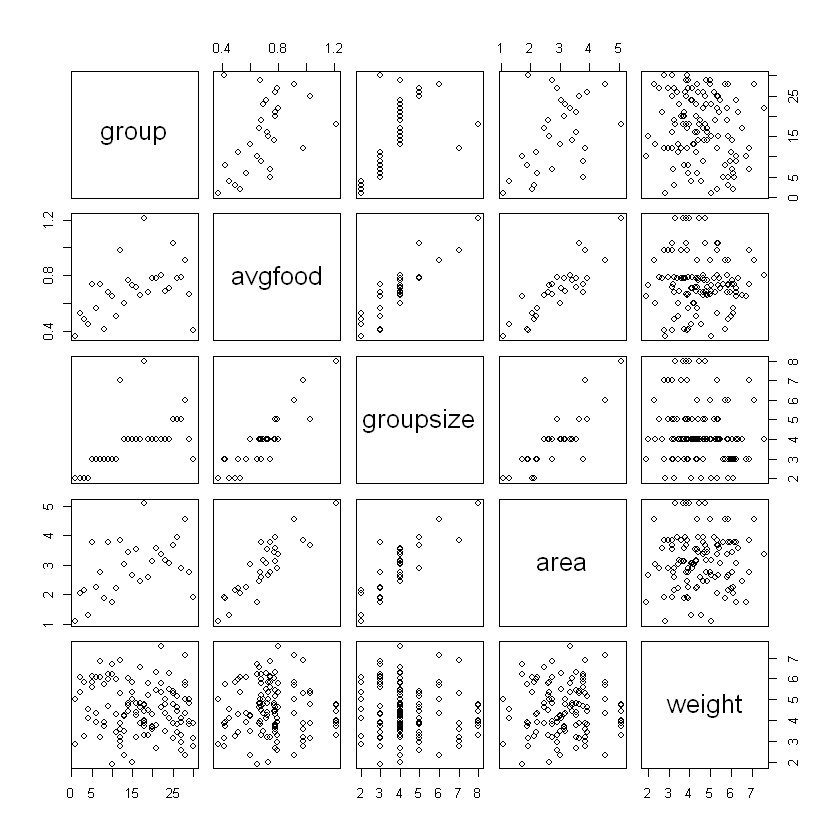

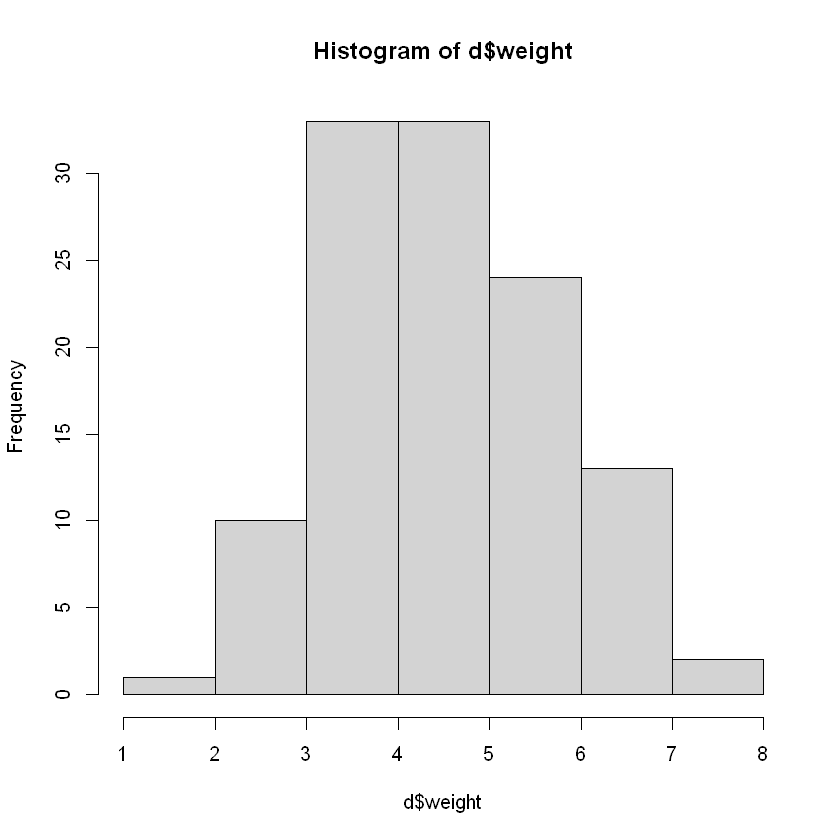

In [3]:
pairs(d)
hist(d$weight)

Thinking logically, we would assume that the size of the terretroy would increase the weight of the individuum, as there is more pray per predator. On the other hand we are unsure if more foxes per group would increase the chance for one individuum to find pray, or if it would decrease it as there are more mouths to feed. Anyways, we build a linear model.

In [4]:
# The weight as a linear model of the area
area.model <- map(
	alist(
		weight ~ dnorm(mu, sigma),
		mu <- a + b * area,
		a ~ dnorm(4, 1),
		b ~ dnorm(0, 10),
		sigma ~ dunif(0, 5)
	),
	data = d
)
area.post <- extract.samples(area.model)
# The weight as a linear model of the size
groupsize.model <- map(
	alist(
		weight ~ dnorm(mu, sigma),
		mu <- a + c * groupsize,
		a ~ dnorm(4, 1),
		c ~ dnorm(0, 10),
		sigma ~ dunif(0, 5)
	),
	data = d
)
groupsize.post <- extract.samples(groupsize.model)

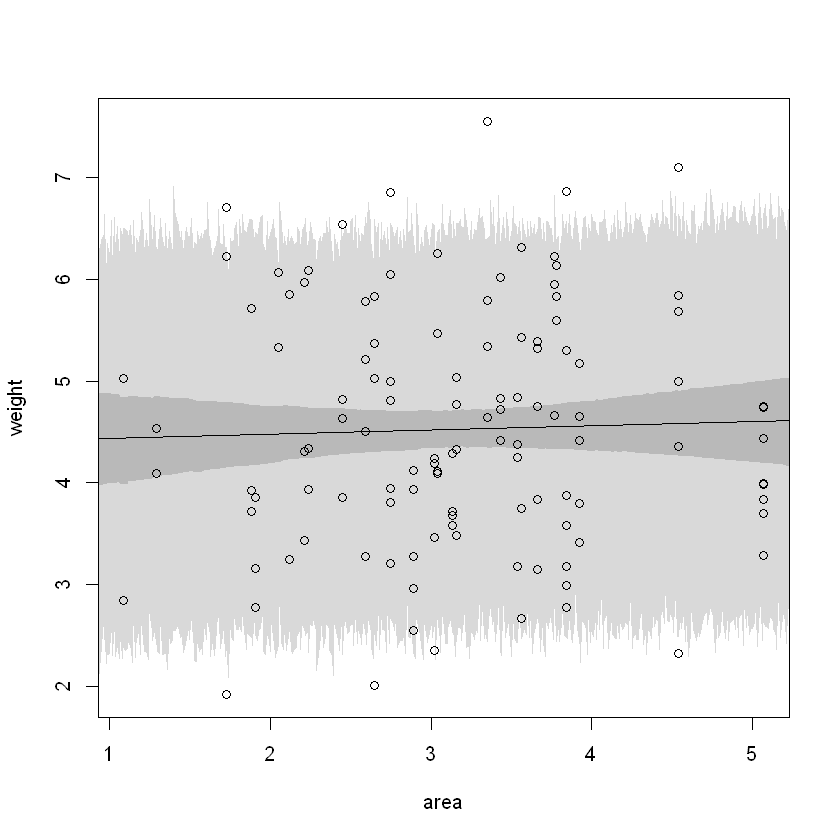

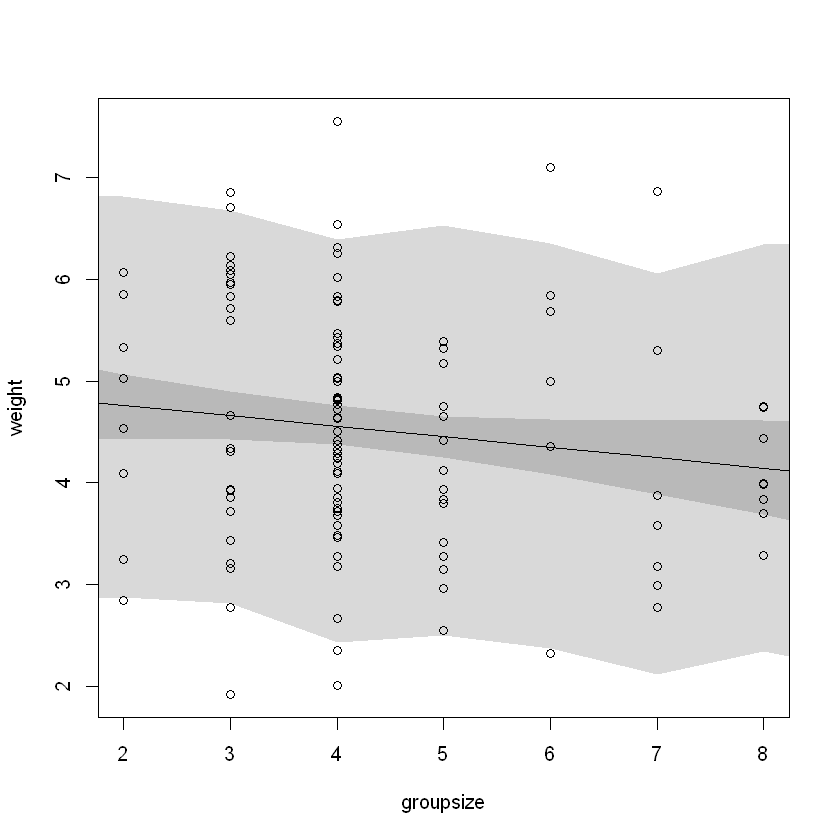

In [5]:
area.mu.link <- function(area) area.post$a + area.post$b * area
groupsize.mu.link <- function(groupsize) groupsize.post$a + groupsize.post$c * groupsize

# Defining the weight grid
area.seq <- seq(from = 0, to = 6, by = 0.01)
groupsize.seq <- seq(from = 1, to = 10, by = 1)

credible_iterval <- 0.91

# For each weight value we calculate a 91 percent credible interval
area.mu <- sapply(area.seq, area.mu.link)
area.mu.mean <- apply(area.mu, 2, mean)
area.mu.HPDI <- apply(area.mu, 2, HPDI, prob = credible_iterval)
groupsize.mu <- sapply(groupsize.seq, groupsize.mu.link)
groupsize.mu.mean <- apply(groupsize.mu, 2, mean)
groupsize.mu.HPDI <- apply(groupsize.mu, 2, HPDI, prob = credible_iterval)

plot(weight ~ area, d)
lines(area.seq, area.mu.mean)
shade(area.mu.HPDI, area.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
area.sim.weight <- sim(area.model, data=list(area = area.seq))
area.weight.HPDI <- apply(area.sim.weight, 2, HPDI, prob = credible_iterval)
shade(area.weight.HPDI, area.seq)

plot(weight ~ groupsize, d)
lines(groupsize.seq, groupsize.mu.mean)
shade(groupsize.mu.HPDI, groupsize.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
groupsize.sim.weight <- sim(groupsize.model, data=list(groupsize = groupsize.seq))
groupsize.weight.HPDI <- apply(groupsize.sim.weight, 2, HPDI, prob = credible_iterval)
shade(groupsize.weight.HPDI, groupsize.seq)

We see that both the size of the group and the area are not correlated in the 91 percent confidence interval.

2. Perform a multivariate regression to predict weight, dependent on both territory size and size of the group. Summarise the results and prepare figures as in (1) for each variable, averaging (i.e. marginalising) over the other variable. Why do these results differ from the ones of (1) ? What do we learn about the incidence of each variable in predicting the red foxes body weight?

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,4.3959956,0.34779105,3.8401583,4.9518328
b,0.6336799,0.19656604,0.3195295,0.9478304
c,-0.4324283,0.12075216,-0.6254136,-0.2394430
sigma,1.1185392,0.07344596,1.0011584,1.2359201


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


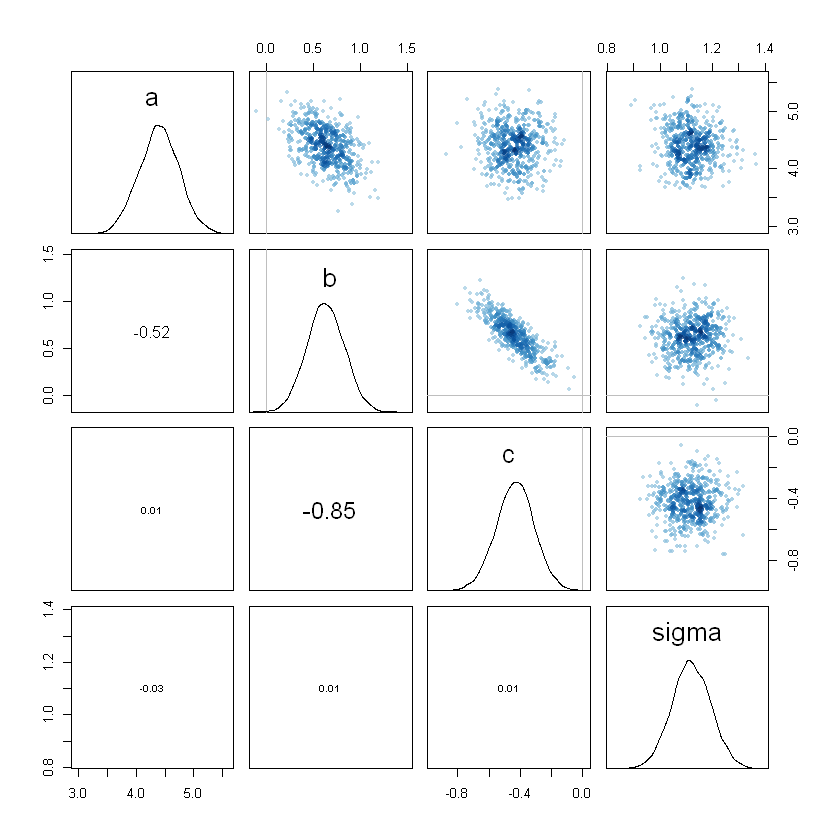

In [6]:
multi.model <- map(
	alist(
		weight ~ dnorm(mu, sigma),
		mu <- a + b * area + c * groupsize,
		a ~ dnorm(4, 1),
		b ~ dnorm(0, 10),
		c ~ dnorm(0, 10),
		sigma ~ dunif(0, 5)
	),
	data = d
)

summary(multi.model)
pairs(multi.model)

multi.post <- extract.samples(multi.model)

In [7]:
multi.sim <- sim(multi.model, n = 1000)

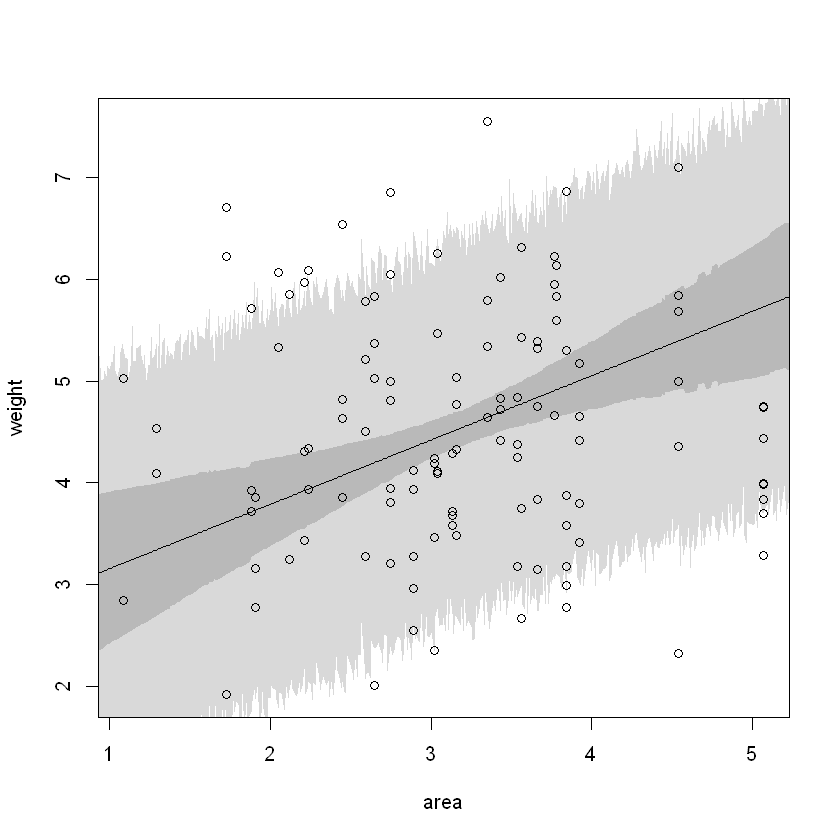

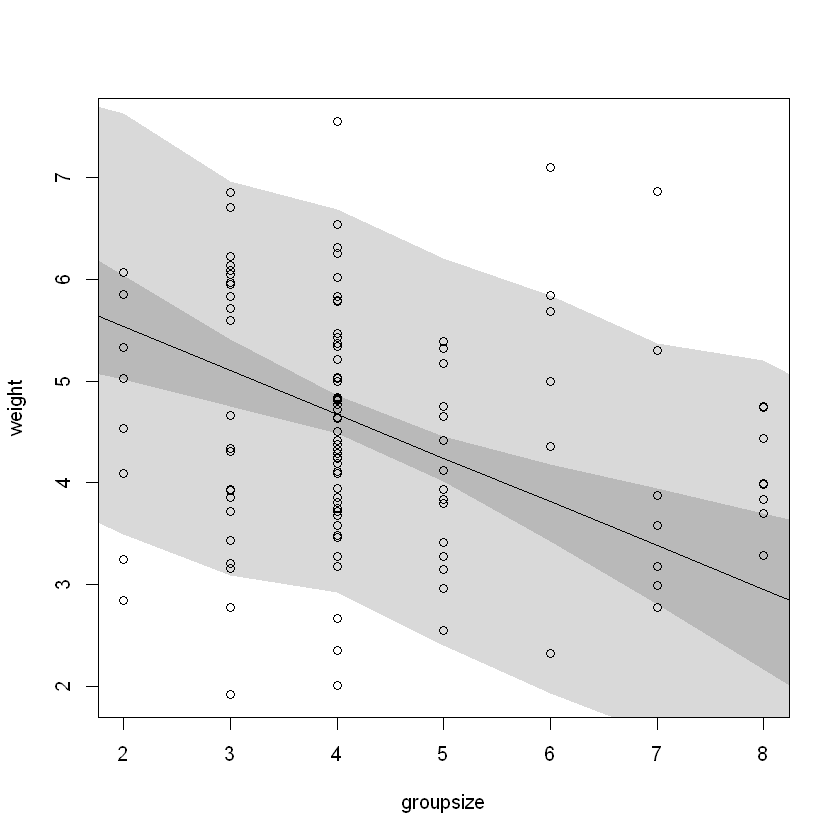

In [8]:
multi.mu.link <- function(area, groupsize) multi.post$a + multi.post$b * area + multi.post$c * groupsize

# Defining the weight grid
area.mean <- mean(d$area)
groupsize.mean <- mean(d$groupsize)

# For each weight value we calculate a 91 percent credible interval
multi.area.mu <- sapply(area.seq, multi.mu.link, groupsize = groupsize.mean)
multi.area.mu.mean <- apply(multi.area.mu, 2, mean)
multi.area.mu.HPDI <- apply(multi.area.mu, 2, HPDI, prob = credible_iterval)
multi.groupsize.mu <- sapply(groupsize.seq, multi.mu.link, area = area.mean)
multi.groupsize.mu.mean <- apply(multi.groupsize.mu, 2, mean)
multi.groupsize.mu.HPDI <- apply(multi.groupsize.mu, 2, HPDI, prob = credible_iterval)

plot(weight ~ area, d)
lines(area.seq, multi.area.mu.mean)
shade(multi.area.mu.HPDI, area.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
multi.area.sim.weight <- sim(multi.model, data=list(area = area.seq, groupsize = groupsize.mean))
multi.area.weight.HPDI <- apply(multi.area.sim.weight, 2, HPDI, prob = credible_iterval)
shade(multi.area.weight.HPDI, area.seq)

plot(weight ~ groupsize, d)
lines(groupsize.seq, multi.groupsize.mu.mean)
shade(multi.groupsize.mu.HPDI, groupsize.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
multi.groupsize.sim.weight <- sim(multi.model, data=list(groupsize = groupsize.seq, area = area.mean))
multi.groupsize.weight.HPDI <- apply(multi.groupsize.sim.weight, 2, HPDI, prob = credible_iterval)
shade(multi.groupsize.weight.HPDI, groupsize.seq)

We learn that each variable alone cannot explain the weight of an individual. But now the model also accounts for the correltaion between the group size and the area. In combination we see that the bigger group size leads to greater area, which in turn is now able to explain the weight of an individual.

3. Include the availability of food in the model. There are obviously several ways to do this, using different levels of model complexity. Try different combinations and compare your findings with the two preceding exercises. Conclude on the most important parameter(s) that affect the foxes weights. Support your findings with tables, correlation plots (use the pairs function) and figures.


Quadratic approximate posterior distribution

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area + c * groupsize + d * avgfood
a ~ dnorm(4.5, 2)
b ~ dnorm(0, 10)
c ~ dnorm(0, 10)
d ~ dnorm(0, 10)
sigma ~ dunif(0, 5)

Posterior means:
         a          b          c          d      sigma 
 4.0905532  0.3886853 -0.6016480  2.4243234  1.1043807 

Log-likelihood: -176.11 

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,4.0905532,0.41847916,3.421742703,4.7593637
b,0.3886853,0.23843294,0.007623392,0.7697472
c,-0.6016480,0.15547105,-0.850120737,-0.3531752
d,2.4243234,1.42931689,0.139998940,4.7086478
sigma,1.1043807,0.07250977,0.988496046,1.2202653


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


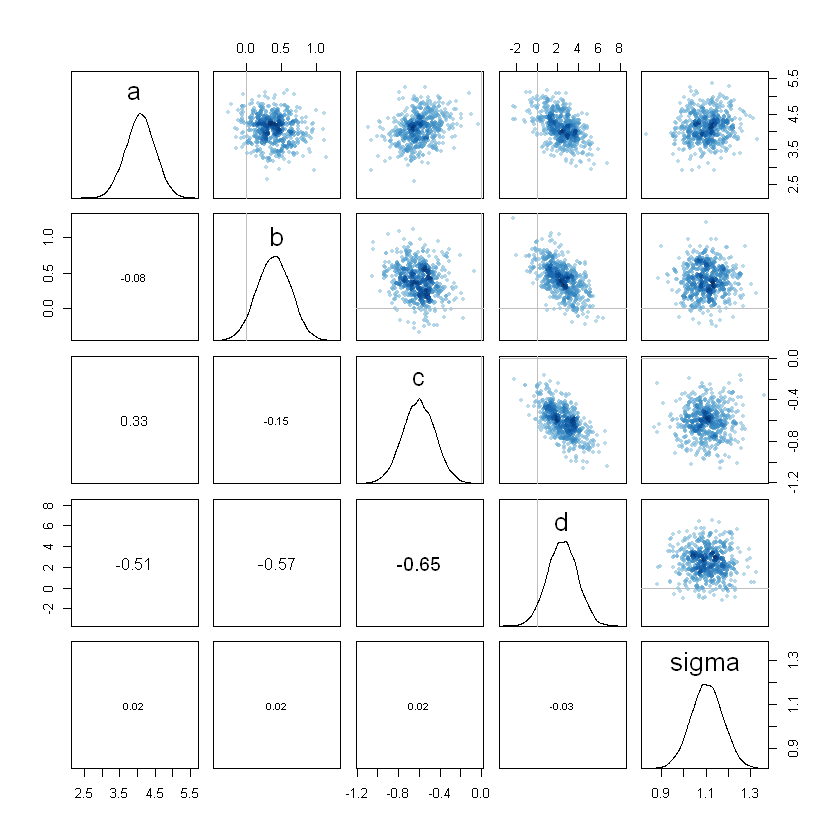

In [12]:
model <- map(
	alist(
		weight ~ dnorm(mu, sigma),
		mu <- a + b * area + c * groupsize + d * avgfood,
		a ~ dnorm(4.5, 2),
		b ~ dnorm(0, 10),
		c ~ dnorm(0, 10),
		d ~ dnorm(0, 10),
		sigma ~ dunif(0, 5)
	),
	data = d
)

model

summary(model)
pairs(model)

model.post <- extract.samples(model)

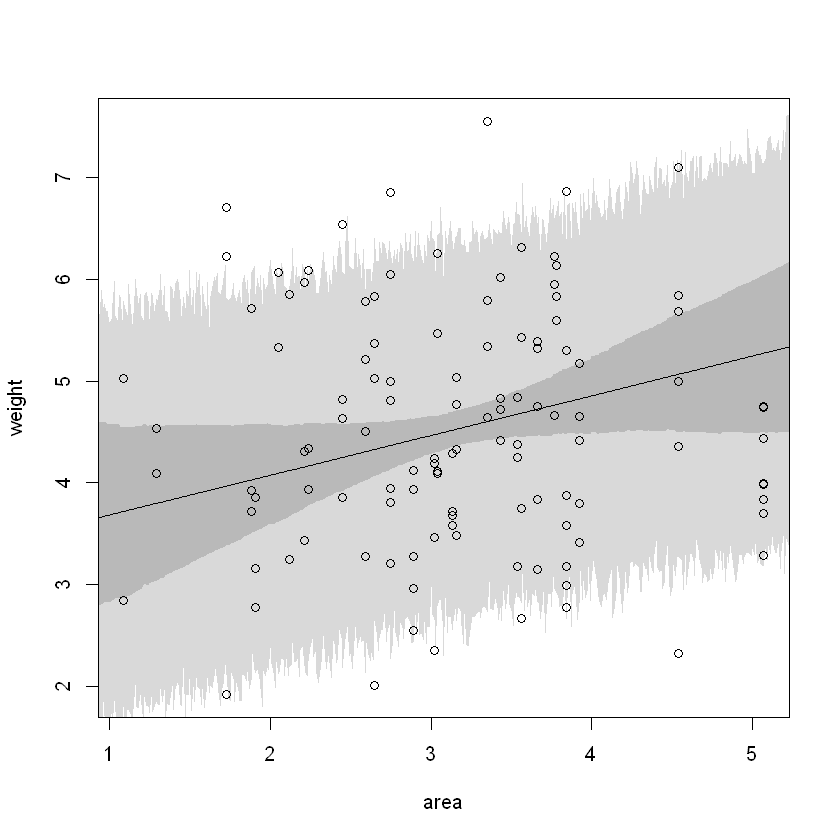

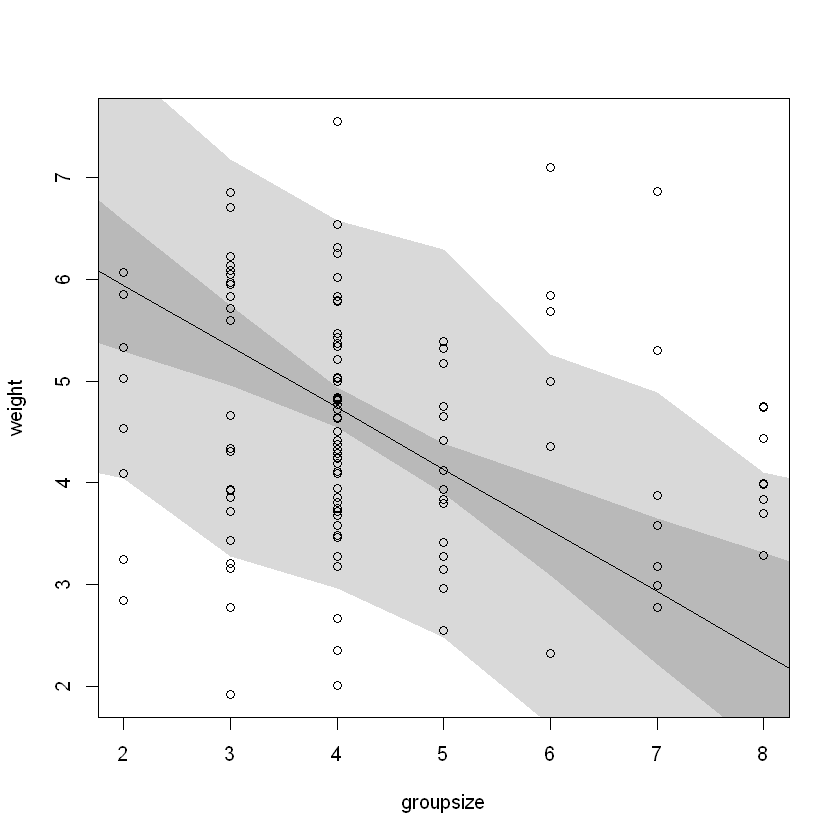

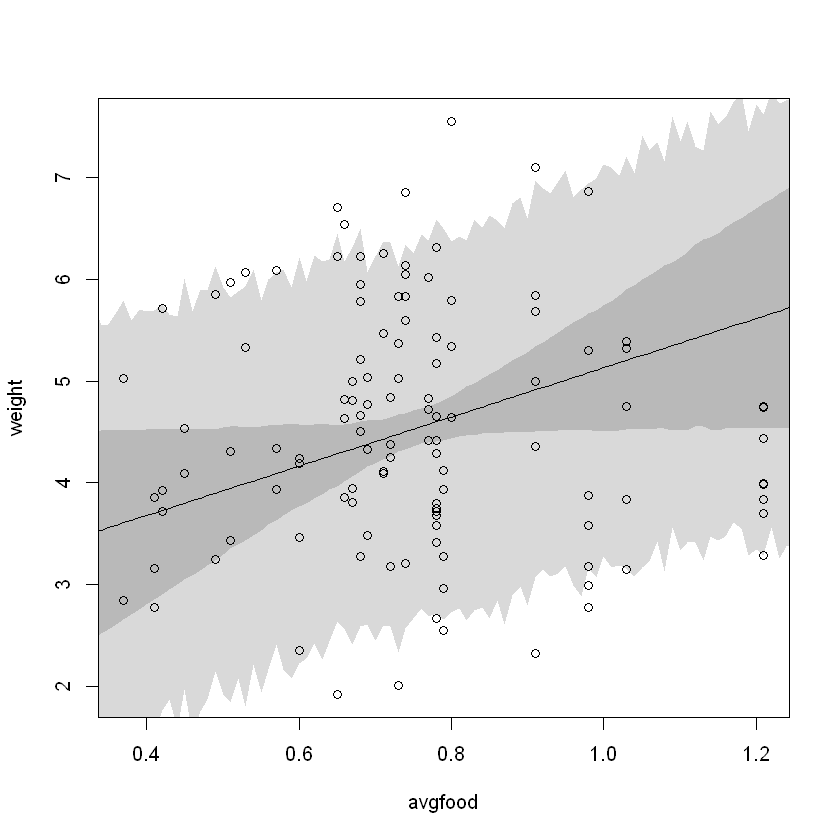

In [11]:
model.mu.link <- function(area, groupsize, avgfood) model.post$a + model.post$b * area + model.post$c * groupsize + model.post$d * avgfood

avgfood.seq <- seq(from = 0.00, to = 1.50, by = 0.01)
avgfood.mean <- mean(d$avgfood)

# For each weight value we calculate a 91 percent credible interval
model.area.mu <- sapply(area.seq, model.mu.link, groupsize = groupsize.mean, avgfood = avgfood.mean)
model.area.mu.mean <- apply(model.area.mu, 2, mean)
model.area.mu.HPDI <- apply(model.area.mu, 2, HPDI, prob = credible_iterval)
model.groupsize.mu <- sapply(groupsize.seq, model.mu.link, area = area.mean, avgfood = avgfood.mean)
model.groupsize.mu.mean <- apply(model.groupsize.mu, 2, mean)
model.groupsize.mu.HPDI <- apply(model.groupsize.mu, 2, HPDI, prob = credible_iterval)
model.avgfood.mu <- sapply(avgfood.seq, model.mu.link, area = area.mean, groupsize = groupsize.mean)
model.avgfood.mu.mean <- apply(model.avgfood.mu, 2, mean)
model.avgfood.mu.HPDI <- apply(model.avgfood.mu, 2, HPDI, prob = credible_iterval)

plot(weight ~ area, d)
lines(area.seq, model.area.mu.mean)
shade(model.area.mu.HPDI, area.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
model.area.sim.weight <- sim(model, data=list(area = area.seq, groupsize = groupsize.mean, avgfood = avgfood.mean))
model.area.weight.HPDI <- apply(model.area.sim.weight, 2, HPDI, prob = credible_iterval)
shade(model.area.weight.HPDI, area.seq)

plot(weight ~ groupsize, d)
lines(groupsize.seq, model.groupsize.mu.mean)
shade(model.groupsize.mu.HPDI, groupsize.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
model.groupsize.sim.weight <- sim(model, data=list(groupsize = groupsize.seq, area = area.mean, avgfood = avgfood.mean))
model.groupsize.weight.HPDI <- apply(model.groupsize.sim.weight, 2, HPDI, prob = credible_iterval)
shade(model.groupsize.weight.HPDI, groupsize.seq)

plot(weight ~ avgfood, d)
lines(avgfood.seq, model.avgfood.mu.mean)
shade(model.avgfood.mu.HPDI, avgfood.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
model.avgfood.sim.weight <- sim(model, data=list(avgfood = avgfood.seq, area = area.mean, groupsize = groupsize.mean))
model.avgfood.weight.HPDI <- apply(model.avgfood.sim.weight, 2, HPDI, prob = credible_iterval)
shade(model.avgfood.weight.HPDI, avgfood.seq)

We see that by including the average food availible in a given terretory we loose the clear result that the area is correlated to the weihgt at the 91 percent credible interval. Also, opposite to what we expected, at the 91 percentile credible interval we cannot say that the average food is correlated to the weight. This changes if we take a lower credible interval.

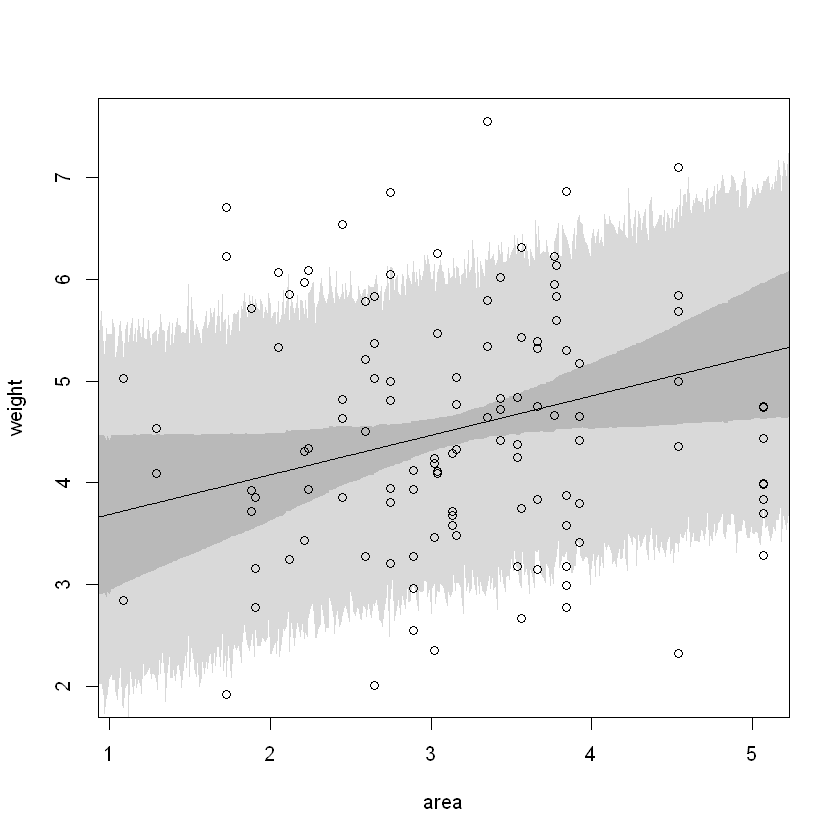

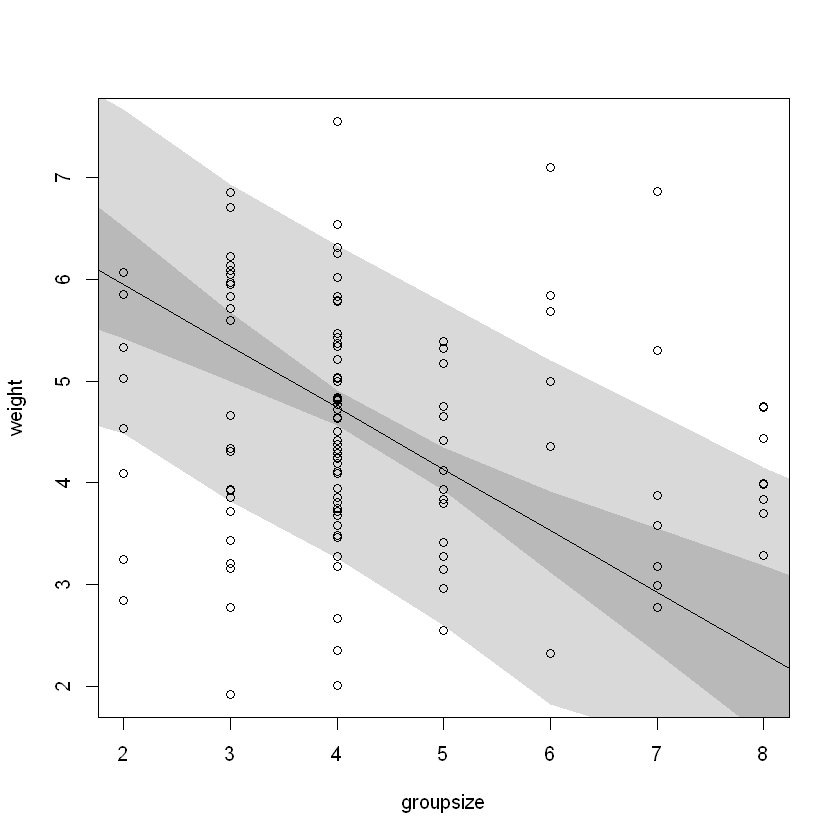

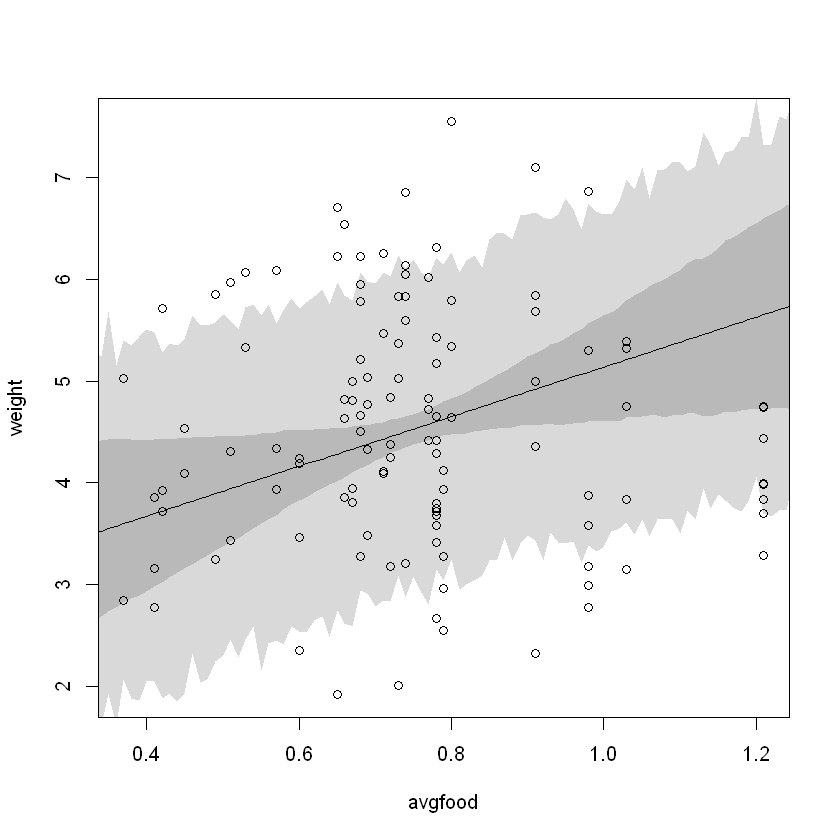

In [13]:
credible_iterval <- 0.85

model.mu.link <- function(area, groupsize, avgfood) model.post$a + model.post$b * area + model.post$c * groupsize + model.post$d * avgfood

avgfood.seq <- seq(from = 0.00, to = 1.50, by = 0.01)
avgfood.mean <- mean(d$avgfood)

# For each weight value we calculate a 91 percent credible interval
model.area.mu <- sapply(area.seq, model.mu.link, groupsize = groupsize.mean, avgfood = avgfood.mean)
model.area.mu.mean <- apply(model.area.mu, 2, mean)
model.area.mu.HPDI <- apply(model.area.mu, 2, HPDI, prob = credible_iterval)
model.groupsize.mu <- sapply(groupsize.seq, model.mu.link, area = area.mean, avgfood = avgfood.mean)
model.groupsize.mu.mean <- apply(model.groupsize.mu, 2, mean)
model.groupsize.mu.HPDI <- apply(model.groupsize.mu, 2, HPDI, prob = credible_iterval)
model.avgfood.mu <- sapply(avgfood.seq, model.mu.link, area = area.mean, groupsize = groupsize.mean)
model.avgfood.mu.mean <- apply(model.avgfood.mu, 2, mean)
model.avgfood.mu.HPDI <- apply(model.avgfood.mu, 2, HPDI, prob = credible_iterval)

plot(weight ~ area, d)
lines(area.seq, model.area.mu.mean)
shade(model.area.mu.HPDI, area.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
model.area.sim.weight <- sim(model, data=list(area = area.seq, groupsize = groupsize.mean, avgfood = avgfood.mean))
model.area.weight.HPDI <- apply(model.area.sim.weight, 2, HPDI, prob = credible_iterval)
shade(model.area.weight.HPDI, area.seq)

plot(weight ~ groupsize, d)
lines(groupsize.seq, model.groupsize.mu.mean)
shade(model.groupsize.mu.HPDI, groupsize.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
model.groupsize.sim.weight <- sim(model, data=list(groupsize = groupsize.seq, area = area.mean, avgfood = avgfood.mean))
model.groupsize.weight.HPDI <- apply(model.groupsize.sim.weight, 2, HPDI, prob = credible_iterval)
shade(model.groupsize.weight.HPDI, groupsize.seq)

plot(weight ~ avgfood, d)
lines(avgfood.seq, model.avgfood.mu.mean)
shade(model.avgfood.mu.HPDI, avgfood.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
model.avgfood.sim.weight <- sim(model, data=list(avgfood = avgfood.seq, area = area.mean, groupsize = groupsize.mean))
model.avgfood.weight.HPDI <- apply(model.avgfood.sim.weight, 2, HPDI, prob = credible_iterval)
shade(model.avgfood.weight.HPDI, avgfood.seq)

At the 85 percent credible interval we can make the statements that avgfood is correlated with the weihgt.

4. When the food availability and territory size are included in the same model, their effect on the weight are reduced and the corresponding errors are larger than when these variables are included in separate models. Explain why (on the model design aspect) and elaborate on the possible (real world) origin.

The average food and the terretory size are clearly dependent on each other, as the bigger terretory yields access to more food and vice versa. If we include both in the same model, we include two parameters that describe the same relation, and as such we would get a family of solutions that describe the same behaviour in nature, whereas if we only take one of those parameters, we would only get one single solution that optimizes for the true behaviour in nature, which improves the result.